In [14]:
import duckdb
# import sklearn
import dask.dataframe as dd
import pandas as pd

pd.set_option('future.no_silent_downcasting', True)
pd.options.display.max_columns = None
pd.set_option('display.precision', 2)

In [15]:
# Connect to DuckDB database
conn = duckdb.connect(database="../database/bdt.duckdb", read_only=False)

# Execute SQL query and fetch data into a Pandas DataFrame
query = "SELECT * FROM student_perf"
student_perf_df = conn.execute(query).fetchdf()

# Convert the Pandas DataFrame to a Dask DataFrame
student_perf_dask = dd.from_pandas(student_perf_df, npartitions=3)

# To compute and get the result, you can use compute() method
student_perf_dask.head()

,sex,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,activities,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,AVG_G,passed
0,False,False,True,True,4,4,2,2,0,True,False,False,False,4,3,4,1,1,3,6,0.28,False
1,False,False,True,False,1,1,1,2,0,False,True,False,False,5,3,3,1,1,3,4,0.27,False
2,False,False,False,False,1,1,1,2,3,True,False,False,False,4,3,2,2,3,3,10,0.42,False
3,False,False,True,False,4,2,1,3,0,False,True,True,True,3,2,2,1,1,5,2,0.73,True
4,False,False,True,False,3,3,1,2,0,False,True,False,False,4,3,2,1,2,5,4,0.43,False


In [16]:
student_perf_dask.dtypes

sex              bool
address          bool
famsize          bool
Pstatus          bool
Medu            int32
Fedu            int32
traveltime      int32
studytime       int32
failures        int32
schoolsup        bool
famsup           bool
activities       bool
romantic         bool
famrel          int32
freetime        int32
goout           int32
Dalc            int32
Walc            int32
health          int32
absences        int32
AVG_G         float64
passed           bool
dtype: object

In [17]:
student_perf_dask.describe().compute()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,AVG_G
count,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00
mean,2.60,2.39,1.52,1.97,0.26,3.94,3.20,3.16,1.49,2.28,3.54,4.43,0.56
std,1.12,1.10,0.73,0.83,0.66,0.93,1.03,1.15,0.91,1.29,1.42,6.21,0.16
min,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.07
25%,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,0.50
50%,3.00,3.00,2.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,0.58
75%,4.00,3.25,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,0.68
max,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,0.97


<Axes: >

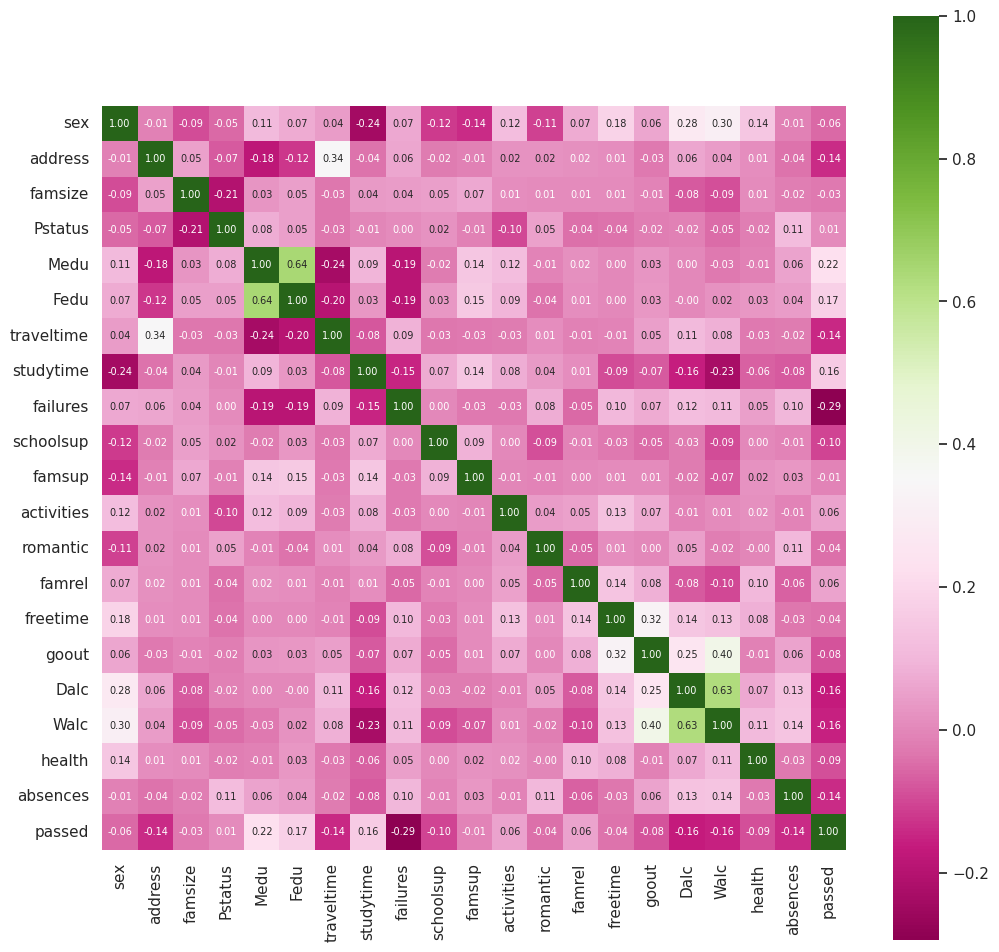

In [18]:
import seaborn as sns

corr_df = student_perf_dask.drop('AVG_G', axis=1)

# plot correlation matrix
sns.set_theme(rc={'figure.figsize':(12, 12)})
sns.heatmap(corr_df.corr().compute(), annot=True, annot_kws={"fontsize":7}, fmt=".2f", cmap="PiYG", square=True)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import joblib

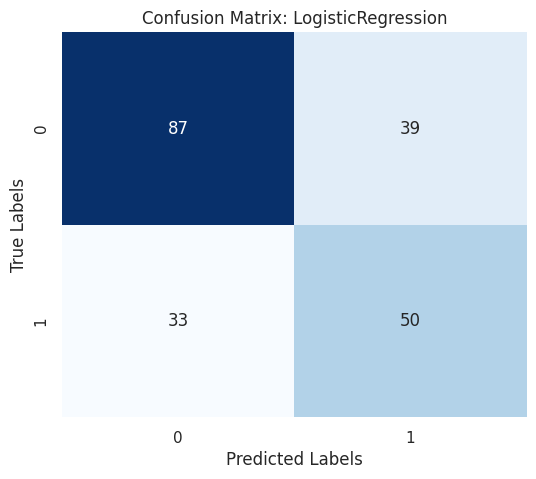

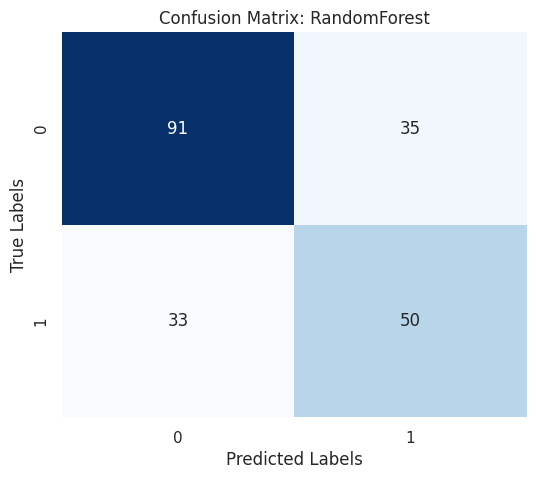

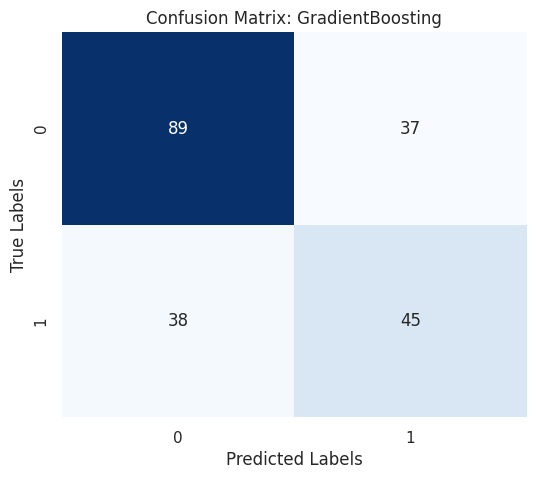

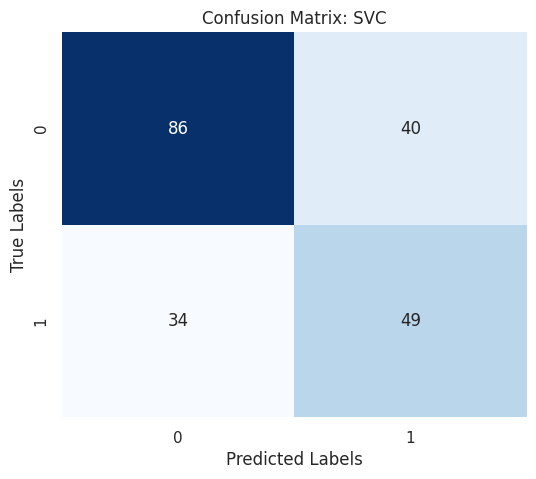

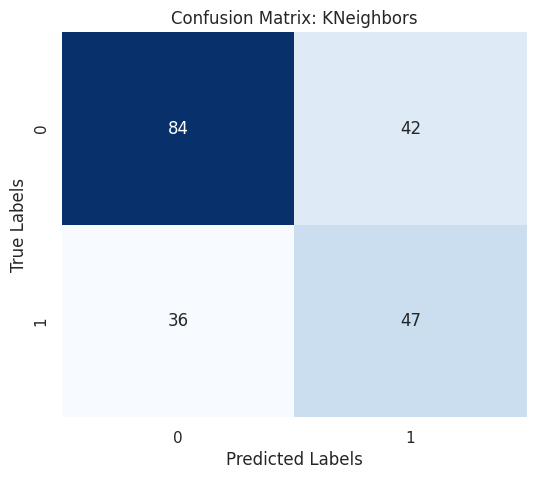

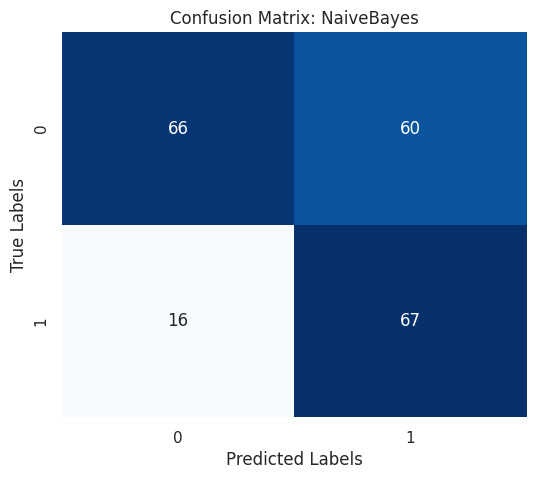

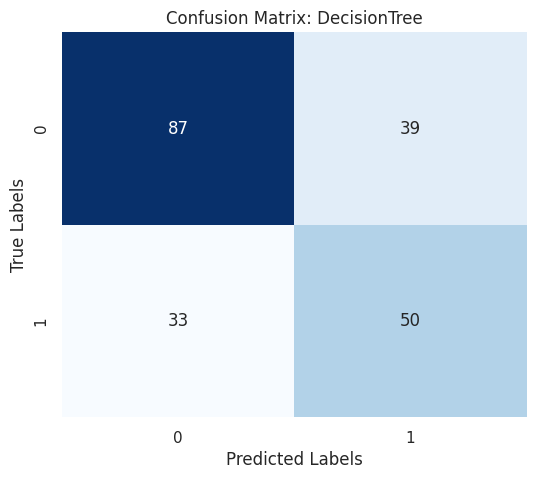

/home/vscode/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-pack

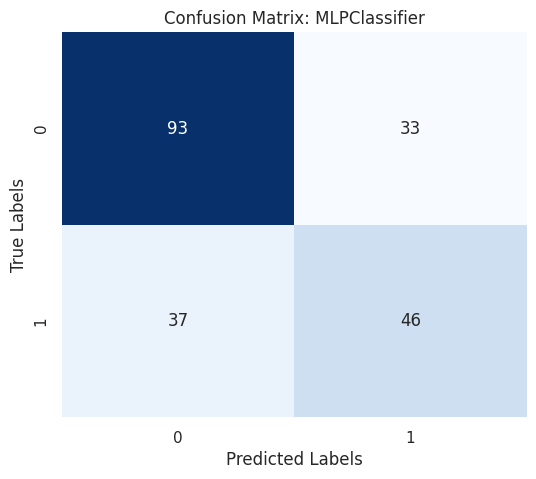

                Model                                        Best Params  \
0  LogisticRegression                   {'C': 10, 'solver': 'liblinear'}   
1        RandomForest             {'max_depth': 10, 'n_estimators': 200}   
2    GradientBoosting  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...   
3                 SVC                       {'C': 1, 'kernel': 'linear'}   
4          KNeighbors          {'n_neighbors': 7, 'weights': 'distance'}   
5          NaiveBayes                                                 {}   
6        DecisionTree                                  {'max_depth': 20}   
7       MLPClassifier  {'activation': 'relu', 'hidden_layer_sizes': (...   

   Best F1-Score  
0           0.66  
1           0.64  
2           0.66  
3           0.65  
4           0.61  
5           0.67  
6           0.60  
7           0.63  


In [20]:
# Example data loading (replace with your actual data)
X = student_perf_dask.drop(['passed','AVG_G'], axis=1).compute()
y = student_perf_dask['passed'].compute()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

# Define the models and their hyperparameters
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20, 30]
        }
    },
    'MLPClassifier': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['tanh', 'relu'],
            'solver': ['adam'],
            'momentum': [0.9]
        }
    }
}

# Define the F1 scorer
f1_scorer = make_scorer(f1_score)
acc_scorer = make_scorer(accuracy_score)

# GridSearchCV for each model
def evaluate_model(model, params, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, params, cv=5, scoring=f1_scorer)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    return best_model, grid_search.best_params_, grid_search.best_score_, conf_mat

# model evaluation
results = []
for model_name, model_info in models.items():
    best_model, best_params, best_score, conf_mat = evaluate_model(model_info['model'], model_info['params'], X_train, y_train, X_test, y_test)
    results.append({
        'Model': model_name,
        'Best Params': best_params,
        'Best F1-Score': best_score,
        'Confusion Matrix': conf_mat
    })

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # save the model
    joblib.dump(best_model, f'best_{model_name}_model_without_AVG_G.pkl')

# show results
results_df = pd.DataFrame(results)
print(results_df[['Model', 'Best Params', 'Best F1-Score']])

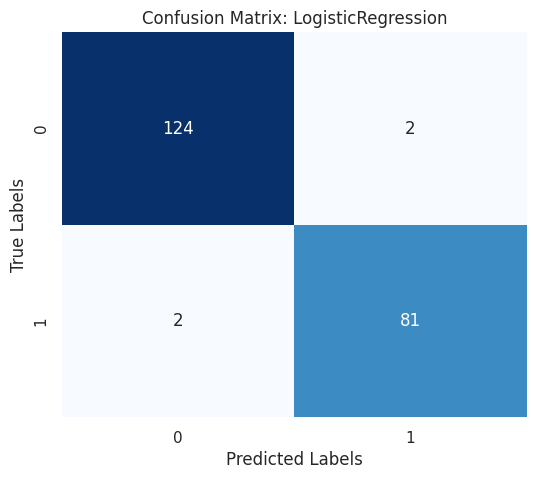

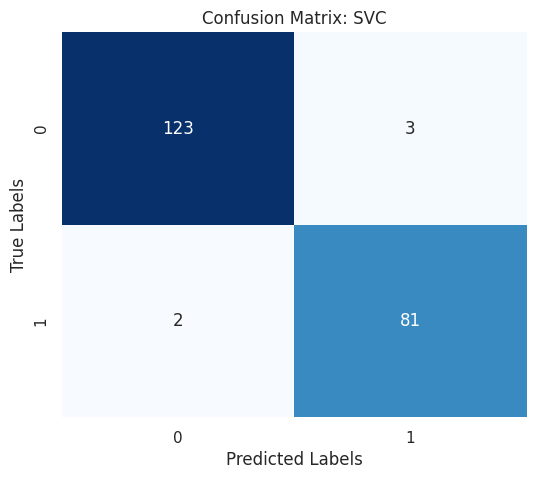

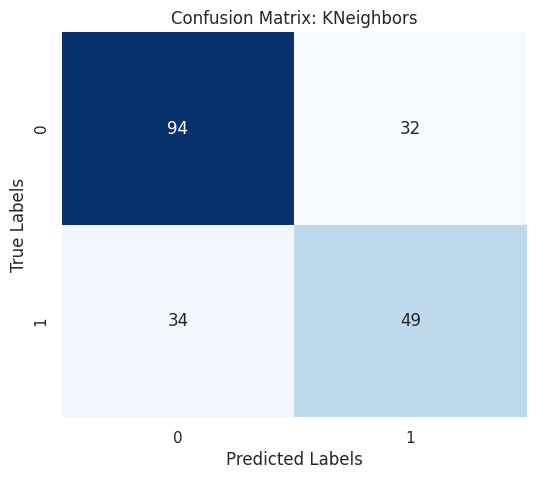

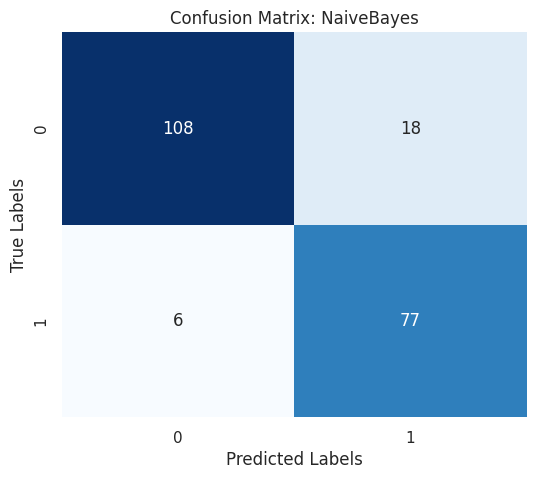

/home/vscode/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-pack

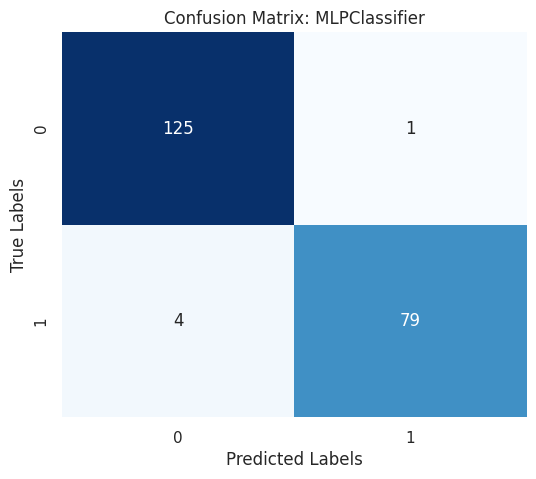

                Model                                        Best Params  \
0  LogisticRegression                  {'C': 100, 'solver': 'liblinear'}   
1                 SVC                      {'C': 10, 'kernel': 'linear'}   
2          KNeighbors          {'n_neighbors': 7, 'weights': 'distance'}   
3          NaiveBayes                                                 {}   
4       MLPClassifier  {'activation': 'tanh', 'hidden_layer_sizes': (...   

   Best F1-Score  
0           0.98  
1           0.97  
2           0.67  
3           0.82  
4           0.93  


In [21]:
# Example data loading (replace with your actual data)
X = student_perf_dask.drop('passed', axis=1).compute()
y = student_perf_dask['passed'].compute()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

# Define the models and their hyperparameters
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear']
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'MLPClassifier': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['tanh', 'relu'],
            'solver': ['adam'],
            'momentum': [0.9]
        }
    }
}

# Define the F1 scorer
f1_scorer = make_scorer(f1_score)
acc_scorer = make_scorer(accuracy_score)

# GridSearchCV for each model
def evaluate_model(model, params, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, params, cv=5, scoring=f1_scorer)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    return best_model, grid_search.best_params_, grid_search.best_score_, conf_mat

# model evaluation
results = []
for model_name, model_info in models.items():
    best_model, best_params, best_score, conf_mat = evaluate_model(model_info['model'], model_info['params'], X_train, y_train, X_test, y_test)
    results.append({
        'Model': model_name,
        'Best Params': best_params,
        'Best F1-Score': best_score,
        'Confusion Matrix': conf_mat
    })

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # save the model
    joblib.dump(best_model, f'best_{model_name}_model_with_AVG_G.pkl')

# show results
results_df = pd.DataFrame(results)
print(results_df[['Model', 'Best Params', 'Best F1-Score']])

In [22]:
conn.close()